In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
dataset = pd.read_csv('50_Startups.csv')

In [9]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
dataset.shape

(50, 5)

In [11]:
dataset = dataset.drop('State',axis=True)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<Axes: >

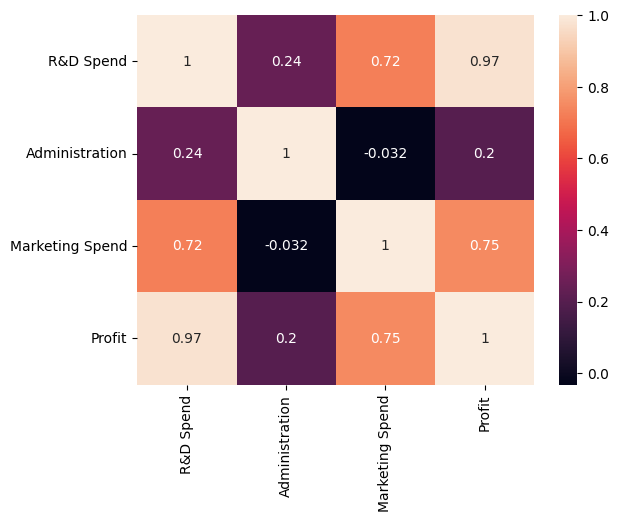

In [12]:
corr = dataset.corr()
sns.heatmap(corr,annot=True)

In [14]:
X = dataset.drop('Profit',axis=True)
y = dataset['Profit']
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((40, 3), (10, 3), (40,), (10,))

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred = regressor.predict(X_test).round(1)

In [21]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original Profit","Predict Profit"])
calculation.head(5)

,Original Profit,Predict Profit
0,103282.38,103901.9
1,144259.40,132763.1
2,146121.95,133567.9
3,77798.83,72911.8
4,191050.39,179627.9


In [22]:
print("Training Accuracy :", regressor.score(X_train, y_train))
print("Testing Accuracy :", regressor.score(X_test, y_test))

Training Accuracy : 0.9499572530324031
Testing Accuracy : 0.9393955917820571


In [23]:
regressor.intercept_

np.float64(111297.71256204927)

In [24]:
regressor.coef_

array([35391.2501208 ,   815.21987542,  4202.06618916])

In [25]:
feature = [165349.20,136897.80,471784.10]
scale_feature = sc.transform([feature])
scale_feature

array([[165349.2, 136897.8, 471784.1]])

In [26]:
y_pred_test = regressor.predict(scale_feature)
y_pred_test

array([7.94609601e+09])

In [27]:
35391.2501208*2.01641149+815.21987542*0.56075291+4202.06618916*2.15394309+ 111297.71256204927

192169.1843003897